The pip installs below are not actually needed

In [18]:
%pip install eurostat
%pip install wbdata
%pip install -U eurostat

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

Sorting the education level data

In [20]:

from dataproject import educ_c
# Display the cleaned DataFrame after removing columns
print("\nEducation DataFrame after removing columns 1-7 and column 11:")
educ_c.head(5)


Education DataFrame after removing columns 1-7 and column 11:


,Country,Years,% tertiary educ.
0,AUT,2011,20.9
1,AUT,2012,22.8
2,AUT,2013,24.9
3,AUT,2014,38.4
4,AUT,2015,38.6


Sorting education data

In [21]:
#Sorting Education data
# Check for duplicates in the 'geo' column
duplicates = educ_c['Country'].duplicated()
print("Duplicates in 'Country' column:")
print(educ_c[duplicates])

# Sort and index the dataframe by the years (2011-2021) for each country
educ_sorted = educ_c.set_index('Country').sort_index(axis=1).reset_index()
# Display the sorted DataFrame
print("\nDataFrame sorted by years for each country:")
educ_sorted.head(5)

Duplicates in 'Country' column:
    Country  Years  % tertiary educ.
1       AUT   2012              22.8
2       AUT   2013              24.9
3       AUT   2014              38.4
4       AUT   2015              38.6
5       AUT   2016              39.7
..      ...    ...               ...
365      UK   2015              46.9
366      UK   2016              47.1
367      UK   2017              47.2
368      UK   2018              48.1
369      UK   2019              49.4

[336 rows x 3 columns]

DataFrame sorted by years for each country:


,Country,% tertiary educ.,Years
0,AUT,20.9,2011
1,AUT,22.8,2012
2,AUT,24.9,2013
3,AUT,38.4,2014
4,AUT,38.6,2015


Pivoting education data in a table

In [22]:
# Pivot the sorted DataFrame to show indicator values for each country
educ_pivoted = educ_sorted.pivot_table(index='Years', columns='Country', values='% tertiary educ.', aggfunc='first')

# Display the pivoted table showing the percentage of the total population for ages 25-34 with a tertiary education level
print("\nPivoted table showing indicator values for each country:")
educ_pivoted.head(5)


Pivoted table showing indicator values for each country:


Country,AUT,BEL,BGR,CHE,CYP,CZE,DEU,DNK,ESP,EST,...,NLD,NOR,POL,PRT,ROU,SRB,SVK,SVN,SWE,UK
Years,,,,,,,,,,,,,,,,,,,,,
2011,20.9,42.5,27.2,38.0,50.5,25.1,27.6,38.6,40.3,39.0,...,40.0,46.1,39.0,27.5,22.5,22.0,25.5,33.8,42.8,43.8
2012,22.8,43.0,27.2,39.3,53.6,27.8,28.9,40.2,40.4,40.1,...,41.4,45.0,40.8,29.0,23.6,24.9,27.0,35.3,43.5,45.1
2013,24.9,42.7,29.6,41.9,51.4,29.2,29.9,40.9,41.1,40.6,...,43.0,46.7,41.8,30.0,24.4,25.1,29.7,37.4,44.9,45.2
2014,38.4,44.2,31.3,44.2,54.0,29.9,28.4,41.6,41.5,40.6,...,44.3,50.2,42.6,31.4,25.4,27.1,29.8,38.0,46.0,45.8
2015,38.6,43.1,31.8,46.5,54.7,31.0,29.6,43.0,41.0,38.5,...,45.1,49.0,43.2,33.1,25.5,29.8,31.3,40.8,46.5,46.9


Now importing fertility data from World Bank Database

In [23]:
from dataproject import fert
fert.head(5)

,Country,Years,Fertility
0,AUT,2011,1.43
1,AUT,2012,1.44
2,AUT,2013,1.44
3,AUT,2014,1.46
4,AUT,2015,1.49


Sorting Fertility Data

In [24]:
# Check for duplicates in the 'Country' column
duplicates = fert['Country'].duplicated()
print("Duplicates in 'Country' column:")
print(fert[duplicates])

# Sort and index the dataframe by the years (2011-2021) for each country
fert_sorted = fert.set_index('Country').sort_index(axis=1).reset_index()

# Display the sorted DataFrame
print("\nDataFrame of fertility sorted by years for each country:")
fert_sorted.head(5)

Duplicates in 'Country' column:
    Country  Years  Fertility
1       AUT   2012       1.44
2       AUT   2013       1.44
3       AUT   2014       1.46
4       AUT   2015       1.49
5       AUT   2016       1.53
..      ...    ...        ...
369     MLT   2017       1.26
370     MLT   2018       1.23
371     MLT   2019       1.14
372     MLT   2020       1.13
373     MLT   2021       1.14

[340 rows x 3 columns]

DataFrame of fertility sorted by years for each country:


,Country,Fertility,Years
0,AUT,1.43,2011
1,AUT,1.44,2012
2,AUT,1.44,2013
3,AUT,1.46,2014
4,AUT,1.49,2015


Pivoting the fertility data in a table

In [25]:
# Pivot the sorted DataFrame to show indicator values for each country
fert_pivoted = fert_sorted.pivot_table(index='Years', columns='Country', values='Fertility', aggfunc='first')

# Display the pivoted table showing Fertility rates
print("\nPivoted table showing fertility values for each country:")
fert_pivoted.head(5)


Pivoted table showing fertility values for each country:


Country,AUT,BEL,BGR,CHE,CYP,CZE,DEU,DNK,ESP,EST,...,MNE,NLD,NOR,POL,PRT,ROU,SRB,SVK,SVN,SWE
Years,,,,,,,,,,,,,,,,,,,,,
2011,1.43,1.81,1.51,1.52,1.360,1.43,1.39,1.75,1.34,1.61,...,1.65,1.76,1.88,1.33,1.35,1.47,1.40,1.45,1.56,1.90
2012,1.44,1.80,1.50,1.52,1.386,1.45,1.41,1.73,1.32,1.56,...,1.72,1.72,1.85,1.33,1.28,1.52,1.45,1.34,1.58,1.91
2013,1.44,1.76,1.48,1.52,1.305,1.46,1.42,1.67,1.27,1.52,...,1.73,1.68,1.78,1.29,1.21,1.46,1.43,1.34,1.55,1.89
2014,1.46,1.74,1.53,1.54,1.315,1.53,1.47,1.69,1.32,1.54,...,1.75,1.71,1.75,1.32,1.23,1.56,1.46,1.37,1.58,1.88
2015,1.49,1.70,1.53,1.54,1.326,1.57,1.50,1.71,1.33,1.58,...,1.74,1.66,1.72,1.32,1.31,1.62,1.46,1.40,1.57,1.85


Merging the Data

In [26]:
# Perform the merge on 'Country' and 'Years' columns between educ_sorted and fert_sorted DataFrames
merged = pd.merge(educ_sorted, fert_sorted, on=['Country', 'Years'], how='left')


# Assign the 'Fertility' series from the 'fert_sorted_ to 'merged' DataFrame
merged['Fertility'] = pd.to_numeric(fert_sorted['Fertility'], errors='coerce')

# Rearrange columns in desired order
merged = merged[['Country', 'Years', 'Fertility', '% tertiary educ.']]

# Display
merged.head(15)

,Country,Years,Fertility,% tertiary educ.
0,AUT,2011,1.43,20.9
1,AUT,2012,1.44,22.8
2,AUT,2013,1.44,24.9
3,AUT,2014,1.46,38.4
4,AUT,2015,1.49,38.6
5,AUT,2016,1.53,39.7
6,AUT,2017,1.52,40.3
7,AUT,2018,1.47,40.5
8,AUT,2019,1.46,41.6
9,AUT,2020,1.44,41.4


In [46]:
# Merge the two pivoted tables on the index
merged_pivoted = pd.merge(fert_pivoted, educ_pivoted, left_index=True, right_index=True, suffixes=('_Fertility', '_% tertiary educ.'))

# Display the merged DataFrame showing both values side by side for each country
merged_pivoted.head(11)

Country,AUT_Fertility,BEL_Fertility,BGR_Fertility,CHE_Fertility,CYP_Fertility,CZE_Fertility,DEU_Fertility,DNK_Fertility,ESP_Fertility,EST_Fertility,...,NLD_% tertiary educ.,NOR_% tertiary educ.,POL_% tertiary educ.,PRT_% tertiary educ.,ROU_% tertiary educ.,SRB_% tertiary educ.,SVK_% tertiary educ.,SVN_% tertiary educ.,SWE_% tertiary educ.,UK
Years,,,,,,,,,,,,,,,,,,,,,
2011,1.43,1.81,1.51,1.52,1.360,1.43,1.39,1.75,1.34,1.61,...,40.0,46.1,39.0,27.5,22.5,22.0,25.5,33.8,42.8,43.8
2012,1.44,1.80,1.50,1.52,1.386,1.45,1.41,1.73,1.32,1.56,...,41.4,45.0,40.8,29.0,23.6,24.9,27.0,35.3,43.5,45.1
2013,1.44,1.76,1.48,1.52,1.305,1.46,1.42,1.67,1.27,1.52,...,43.0,46.7,41.8,30.0,24.4,25.1,29.7,37.4,44.9,45.2
2014,1.46,1.74,1.53,1.54,1.315,1.53,1.47,1.69,1.32,1.54,...,44.3,50.2,42.6,31.4,25.4,27.1,29.8,38.0,46.0,45.8
2015,1.49,1.70,1.53,1.54,1.326,1.57,1.50,1.71,1.33,1.58,...,45.1,49.0,43.2,33.1,25.5,29.8,31.3,40.8,46.5,46.9
2016,1.53,1.68,1.54,1.54,1.360,1.63,1.60,1.79,1.34,1.60,...,45.2,49.2,43.5,35.0,24.8,31.4,33.4,43.0,47.3,47.1
2017,1.52,1.65,1.56,1.52,1.322,1.69,1.57,1.75,1.31,1.59,...,46.6,48.3,43.6,34.0,25.6,32.2,35.1,44.5,47.4,47.2
2018,1.47,1.62,1.56,1.52,1.320,1.71,1.57,1.73,1.26,1.67,...,47.6,48.5,43.5,35.1,24.9,32.8,37.2,40.7,47.6,48.1
2019,1.46,1.60,1.58,1.48,1.332,1.71,1.54,1.70,1.23,1.66,...,49.1,48.4,43.5,37.4,25.5,33.4,39.2,44.1,48.4,49.4


Below we will see if the years are the same for both data sets, and if there are some countries excluded. We see that Great Britain is not included in the education level data.

In [28]:
print(f'Years in education data: {educ_sorted.Years.unique()}')
print(f'country in education data = {len(educ_sorted.Country.unique())}')
print(f'Years in fertility data: {fert_sorted.Years.unique()}')
print(f'country in fertility data = {len(fert_sorted.Country.unique())}')

Years in education data: [2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]
country in education data = 34
Years in fertility data: [2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021]
country in fertility data = 34


In [29]:
diff_y = [y for y in fert_sorted.Years.unique() if y not in educ_sorted.Years.unique()] 
print(f'years in fertility data, but not in education data: {diff_y}')

diff_m = [m for m in fert_sorted.Country.unique() if m not in educ_sorted.Country.unique()] 
print(f'countries in fertility data, but not in education data: {diff_m}')

years in fertility data, but not in education data: []
countries in fertility data, but not in education data: ['GBR']


Graph which allows you to select the country you wish to see (note: GBR has no fertility data). You can change the country by changing the country code in the last line.

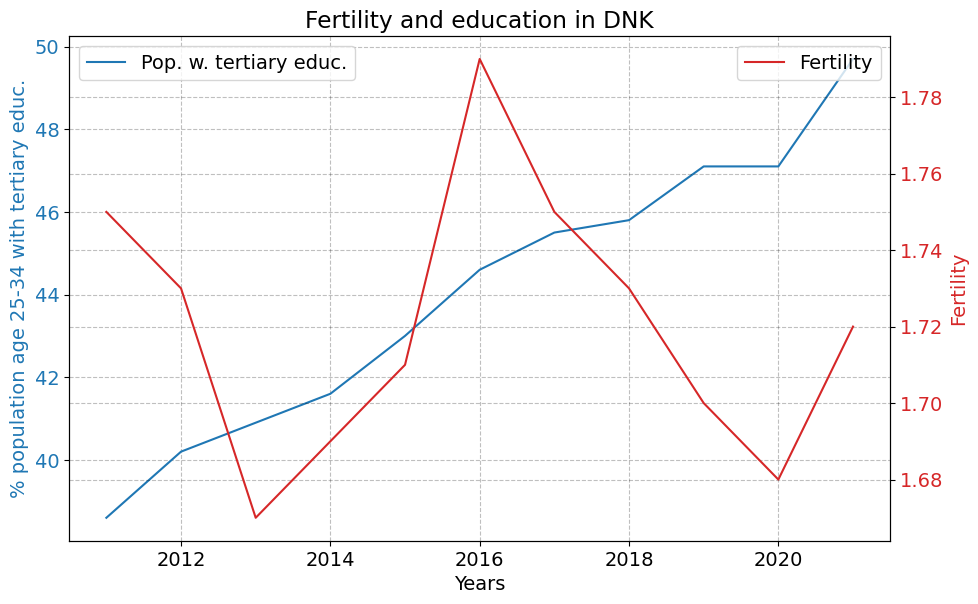

In [30]:
import matplotlib.pyplot as plt

def plot_fer_educ_country(educ_sorted, fert_sorted, country_code):
    # Create a figure and axis object
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot each DataFrame. Specify the ax parameter to ensure all plots are on the same axes.
    educ_country = educ_sorted.loc[educ_sorted['Country'] == country_code, :]
    fertility_country = fert_sorted.loc[fert_sorted['Country'] == country_code, :]  

    # Plot the data about population with a BA on the first y-axis
    color = 'tab:blue'
    ax1.set_xlabel('Years')
    ax1.set_ylabel('% population age 25-34 with tertiary educ.', color=color)
    educ_country.plot(x='Years', y='% tertiary educ.', ax=ax1, label='Pop. w. tertiary educ.', color=color)  # Assuming 'educ.' is renamed to '%'
    ax1.tick_params(axis='y', labelcolor=color)

    # Create a second y-axis that shares the same x-axis
    ax2 = ax1.twinx()

    # Plot the data about fertility on the second y-axis
    color = 'tab:red'
    ax2.set_ylabel('Fertility', color=color)
    fertility_country.plot(x='Years', y='Fertility', ax=ax2, label='Fertility', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    # Add title and legend
    fig.tight_layout()  # To ensure the right y-label is not clipped
    ax1.set_title("Fertility and education in " + country_code)

    # Display the plot
    plt.show()

# Call the function with country code, for example, 'DNK' = (Denmark)
plot_fer_educ_country(educ_sorted, fert_sorted, 'DNK')

Below is a plot which can show 3 countries at once. To adjust the countries you want to see, change the second to last line named "country_codes" and adjust country codes. Also, depending on which country you choose, you might need to adjust the y-axis limits.

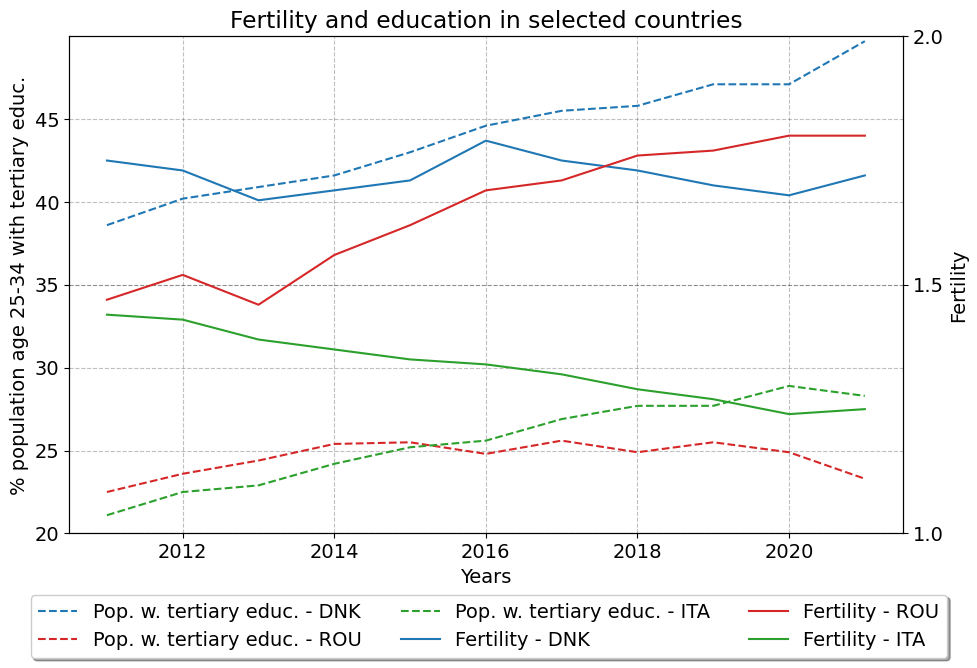

In [47]:
import matplotlib.pyplot as plt

def plot_fertility_education_country(educ_sorted, fert_sorted, country_codes):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Set colors for plotting
    educ_colors = ['tab:blue', 'tab:red', 'tab:green']
    fert_colors = ['tab:blue', 'tab:red', 'tab:green']

    ax2 = ax.twinx()  # Create a secondary y-axis that shares the same x-axis with ax

    for i, country_code in enumerate(country_codes):
        educ_country = educ_sorted.loc[educ_sorted['Country'] == country_code]
        fertility_country = fert_sorted.loc[fert_sorted['Country'] == country_code]

        # Plot the data for education for each country
        color_educ = educ_colors[i]
        educ_label = 'Pop. w. tertiary educ. - ' + country_code
        educ_country.plot(x='Years', y='% tertiary educ.', ax=ax, label=educ_label, color=color_educ, linestyle='--')
        
        # Plot the data for fertility for each country
        color_fert = fert_colors[i]
        fert_label = 'Fertility - ' + country_code
        fertility_country.plot(x='Years', y='Fertility', ax=ax2, label=fert_label, color=color_fert)
        # Remove the legends inside the plot
        ax.get_legend().remove()
        ax2.get_legend().remove()

    # Set y-axis limits, ticks and label for population axis
    ax.set_ylim(20, 50)
    ax.set_yticks(range(20, 50, 5))
    ax.set_ylabel('% population age 25-34 with tertiary educ.', color='black')

    # Set y-axis limits, ticks and label for fertility axis
    ax2.set_ylim(1, 2)  # Adjust y-axis limits for fertility data
    ax2.set_yticks([1, 1.5, 2])  # Set custom y-axis ticks for fertility data
    ax2.set_ylabel('Fertility', color='black')

    # Add title
    fig.tight_layout()
    plt.title("Fertility and education in selected countries")

    fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=3)

   
    plt.show()

# List of up to 3 country codes to compare
country_codes = ['DNK', 'ROU', 'ITA']

# Call the function with multiple country codes
plot_fertility_education_country(educ_sorted, fert_sorted, country_codes)